Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
from scripts.imports import *
from scripts.data_variables import *

In [2]:
from scripts.get_read_write import *

In [3]:
player_ids = read_player_ids()
player_summaries = read_player_summaries()
player_friends = read_player_friends()
player_games = read_player_games()
player_achievements = read_player_achievements()
player_bans = read_player_bans()
global_game_stats = read_global_game_stats()
game_names = read_game_names()
print("data lengths: ", len(player_ids), len(player_summaries), len(player_friends), len(player_games), len(player_achievements), len(player_bans), len(global_game_stats))

INFO: reading ids
INFO: reading ids finished
INFO: reading summaries
INFO: reading summaries finished
INFO: reading friends
INFO: reading friends finished
INFO: reading games
INFO: reading games finished
INFO: reading achievements
INFO: reading achievements finished
INFO: reading bans
INFO: reading bans finished
INFO: reading global game stats
INFO: reading global game stats finished
INFO: reading game names
INFO: reading game names finished
data lengths:  10000 10000 10000 10000 110 10000 14922


In [4]:
player_summaries = api_fill_player_summaries(player_ids, player_summaries)

INFO: requesting summaries
INFO: requesting: 0
INFO: requesting summaries finished
Time needed: 0.009505510330200195 seconds 


In [5]:
player_friends = api_fill_player_friends(player_ids, player_summaries, player_friends)

INFO: requesting friends
INFO: requesting: 6
INFO: requesting friends finished
Time needed: 0.46796464920043945 seconds 


In [6]:
#player_games = api_fill_player_games(player_ids, player_summaries, player_games) #mostly friends only access

In [7]:
player_achievements = api_fill_player_achievements(player_ids, player_games, player_summaries, player_achievements)

INFO: requesting achievements
INFO: requesting: 293
INFO: requesting achievements finished
Time needed: 114.42227721214294 seconds 


In [8]:
player_bans = api_fill_player_bans(player_ids, player_summaries, player_bans)

INFO: requesting bans
INFO: requesting: 0
INFO: requesting bans finished
Time needed: 0.008006095886230469 seconds 


In [9]:
global_game_stats = api_fill_global_game_stats(player_games, global_game_stats)

INFO: requesting global game stats
INFO: requesting: 0
INFO: requesting global game stats finished
Time needed: 0.14159417152404785 seconds 


In [10]:
game_names = api_fill_game_names()

INFO: requesting game names
INFO: requesting game names finished
Time needed: 1.260803461074829 seconds 


In [11]:
filled_p(player_summaries)

Currently: 10000 out of 10000


In [12]:
filled_p(player_friends)

Currently: 8995 out of 10000


In [13]:
filled_p(player_games)

Currently: 284 out of 10000


In [14]:
filled_p(player_achievements)

Currently: 24 out of 110


In [15]:
filled_p(player_bans)

Currently: 10000 out of 10000


In [16]:
filled_p(global_game_stats)

Currently: 14922 out of 14922


In [17]:
filled_p(game_names)

Currently: 61676 out of 61676


In [18]:
write_player_ids(player_ids)

INFO: writing ids
INFO: finised writing ids


In [19]:
write_player_summaries(player_summaries)

INFO: writing summaries
INFO: finised writing summaries


In [20]:
write_player_friends(player_friends)

INFO: writing friends
INFO: finised writing friends


In [21]:
write_player_games(player_games)

INFO: writing games
INFO: finised writing games


In [22]:
write_player_achievements(player_achievements)

INFO: writing achievements
INFO: finised writing acievements


In [23]:
write_player_bans(player_bans)

INFO: writing bans
INFO: finised writing bans


In [24]:
write_global_game_stats(global_game_stats)

INFO: writing global_game_stats
INFO: finised writing global game stats


In [25]:
write_game_names(game_names)

INFO: writing game names
INFO: finised writing game names


{'steamid': '76561198101569818', 'communityvisibilitystate': 3, 'profilestate': 1, 'personaname': 'Leo Alioth', 'lastlogoff': 1527542915, 'profileurl': 'https://steamcommunity.com/id/pg97/', 'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be.jpg', 'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be_medium.jpg', 'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be_full.jpg', 'personastate': 0, 'realname': 'Anže', 'primaryclanid': '103582791434796278', 'timecreated': 1375693680, 'personastateflags': 0, 'loccountrycode': 'SI'}


# Odgovori na vprašanja

(7951, 847) (1049, 153)


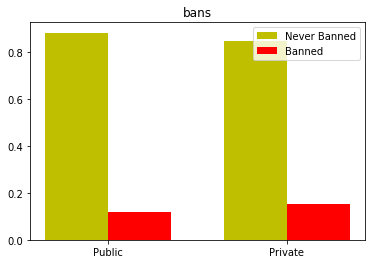

In [27]:
good, bad = get_ban_visibility_data(player_summaries, player_bans)
print(good, bad)
ban_visibility_plot(good, bad)